In [1]:
!pwd

/Users/macbook/divtel/SST


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## LOAD CTA CONFIG

In [3]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-02-26T11:36:22.530


In [4]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [5]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [6]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [7]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


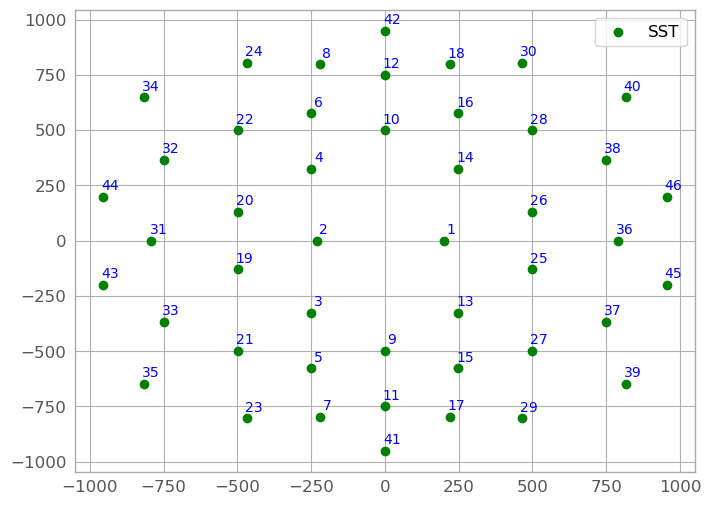

In [8]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [9]:
array.hFoV(m_cut=3) 

46it [00:06,  6.91it/s]


(62.238869377690584, 46.0)

In [10]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [11]:


sub_group_div = {'1':[24,12,30,42,8,18], 
             '2':[44,32,34],
              '3':[43,33,35],
              '4':[23,41,29,11,7,17],
              '5':[37,39,45],
              '6':[38,40,46],
              '7':[1,2,9,10],
              '8':[16,26,28],
              '9':[15,25,27],
              '10':[13,14,36],
              '11':[5,19,21],
              '12':[6,20,22],
              '13':[3,4,31]
            
    
}


In [12]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [13]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_group_div)

In [14]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)



<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45


In [15]:
# Define the file path where you want to save the output
output_file_path = './SST_best_config_div_conv_together.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_best_config_div_conv_together.txt


## MULTIPLE DIVERGENCES

SST configuration with two subarrays

In [16]:
array_SST_2_diff_div= LoadConfig('./SST_best_config_div_conv_together.txt', frame=cta, pointing2src=True)

In [17]:
array_SST_2_diff_div.table.units = "deg"
array_SST_2_diff_div.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


## Here I am trying to find the multiplicity for each subarray division 

In [18]:
 number_of_telescopes_subarray_1

[6, 3, 3, 6, 3, 3, 4, 3, 3, 3, 3, 3, 3]

In [19]:
table_SST_conv = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_conv=[]
# Append the columns for LST so I know what to get or expect
table_SST_conv.append(table_SST['x'])
table_SST_conv.append(table_SST['y'])
table_SST_conv.append(table_SST['z'])
table_SST_conv.append(table_SST['focal'])
table_SST_conv.append(table_SST['radius'])
table_SST_conv.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config = []
telescopes = [1, 2,3,4,5,6]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Putting it tel-1 because the first column we had the index
    sub_config.append([col[tel - 1] for col in table_SST_conv])
    number_of_telescopes_config_SST_conv.append(number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config)
print(number_of_telescopes_config_SST_conv)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]
[6, 3, 3, 6, 3, 3]


In [20]:
table_SST_div = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_div=[]
# Append the columns for LST so I know what to get or expect
table_SST_div.append(table_SST['x'])
table_SST_div.append(table_SST['y'])
table_SST_div.append(table_SST['z'])
table_SST_div.append(table_SST['focal'])
table_SST_div.append(table_SST['radius'])
table_SST_div.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config_div= []
telescopes = [7,8,9,10,11,12,13]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_div.append([col[tel - 1] for col in table_SST_div])
    number_of_telescopes_config_SST_div.append( number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config_div)
print(number_of_telescopes_config_SST_div)

[[-7.75, 0.0, 22.5, 5.6, 4.450000000000001, 62.46242685852285], [415.67, 402.0, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [415.67, -402.0, 27.92, 5.6, 4.450000000000001, 62.46242685852285], [429.33, 0.0, 16.08, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, -402.0, 48.25, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, 402.0, 15.58, 5.6, 4.450000000000001, 62.46242685852285], [-429.67, 0.0, 29.42, 5.6, 4.450000000000001, 62.46242685852285]]
[4, 3, 3, 3, 3, 3, 3]


In [21]:
print(sub_config)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]


In [22]:
# Define the file path where you want to save the output
output_file_path_3 = './best_config_SST_conv.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output


New telescope data has been written to ./best_config_SST_conv.txt


In [23]:
output_file_path_4 = './best_config_SST_div.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_div:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./best_config_SST_div.txt


In [24]:
full_array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt",frame=cta)
complete_array= LoadConfig("/Users/macbook/divtel/SST/SST_best_config_div_conv_together.txt",frame=cta)
array_conv = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_conv.txt",complete_array=complete_array, frame=cta)
array_div = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_div.txt",complete_array=complete_array, frame=cta)

In [25]:
array_div.table.units='deg'
array_div.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
2,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95
3,415.67,-402.0,27.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.74
4,429.33,0.0,16.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,430.16
5,-415.67,-402.0,48.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.14
6,-415.67,402.0,15.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.90
7,-429.67,0.0,29.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,429.00


In [26]:
complete_array.table.units='deg'
complete_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


In [27]:
array_conv.table.units='deg'
array_conv.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87


In [64]:
complete_array.table.units='deg'
complete_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,356.261,0.027,89.973,5.600,4.450,62.462,0.998,0.065,0.000,816.85
2,-840.0,404.67,16.75,358.012,0.054,89.946,5.600,4.450,62.462,0.999,0.035,0.001,931.85
3,-840.0,-404.67,55.92,1.988,0.139,89.861,5.600,4.450,62.462,0.999,-0.035,0.002,932.21
4,0.0,-816.83,65.42,3.739,0.173,89.827,5.600,4.450,62.462,0.998,-0.065,0.003,817.70
5,839.67,-404.67,17.75,1.738,0.043,89.957,5.600,4.450,62.462,1.000,-0.030,0.001,932.76
6,839.67,404.67,10.08,358.262,0.076,89.924,5.600,4.450,62.462,1.000,0.030,0.001,932.87
7,-7.75,0.0,22.5,-0.000,0.024,89.976,5.600,4.450,62.462,1.000,0.000,0.000,8.77
8,415.67,402.0,12.42,358.217,0.068,89.932,5.600,4.450,62.462,1.000,0.031,0.001,578.95


In [45]:
full_array.table.units='deg'
full_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,-0.000,0.017,89.983,5.600,4.450,62.462,1.000,0.000,0.000,200.19
2,-230.0,0.0,22.75,-0.000,0.009,89.991,5.600,4.450,62.462,1.000,0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.412,0.014,89.986,5.600,4.450,62.462,1.000,-0.007,0.000,409.12
4,-249.0,325.0,17.25,359.588,0.016,89.984,5.600,4.450,62.462,1.000,0.007,0.000,409.16
5,-249.0,-577.0,54.25,0.731,0.031,89.969,5.600,4.450,62.462,1.000,-0.013,0.001,628.62
6,-249.0,577.0,8.25,359.269,0.027,89.973,5.600,4.450,62.462,1.000,0.013,0.000,628.51
7,-220.0,-797.0,68.25,1.009,0.049,89.951,5.600,4.450,62.462,1.000,-0.018,0.001,827.51
8,-220.0,797.0,10.25,358.991,0.025,89.975,5.600,4.450,62.462,1.000,0.018,0.000,826.84


The barycenter -1.1557142857142904
The barycenter 0.0
The barycenter 24.595714285714287
1.2221690246306518
-0.0
alt 1.2221690246306518 rad
az -0.0 rad
1.1891378690732617
-0.08547009872770799
alt 1.1891378690732617 rad
az -0.08547009872770799 rad
1.189593965458718
0.08547009872770799
alt 1.189593965458718 rad
az 0.08547009872770799 rad
1.1895047355876842
-0.0
alt 1.1895047355876842 rad
az -0.0 rad
1.2522357168306066
0.1037549524490073
alt 1.2522357168306066 rad
az 0.1037549524490073 rad
1.2514079953160022
-0.1037549524490073
alt 1.2514079953160022 rad
az -0.1037549524490073 rad
1.2544373467232324
-0.0
alt 1.2544373467232324 rad
az -0.0 rad


13it [00:01,  7.17it/s]
13it [00:01,  7.02it/s]


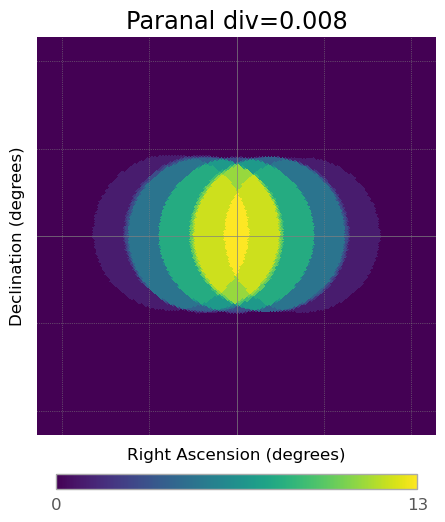

In [66]:
array_div.divergent_pointing(div=0.008)
complete_array.multiplicity_plot()


The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
1.222120825704168 rad
-0.0 rad
1.189082111560649 rad
-0.08547884876417715 rad
1.1895383811626927 rad
0.08547884876417715 rad
1.1894492050480268 rad
-0.0 rad
1.2521943898540595 rad
0.10376783219523598 rad
1.2513663579851608 rad
-0.10376783219523598 rad
1.2543966727348794 rad
-0.0 rad


6it [00:00,  7.03it/s]
7it [00:00,  7.03it/s]
6it [00:00,  6.73it/s]


10.386999382873206


7it [00:00,  7.17it/s]


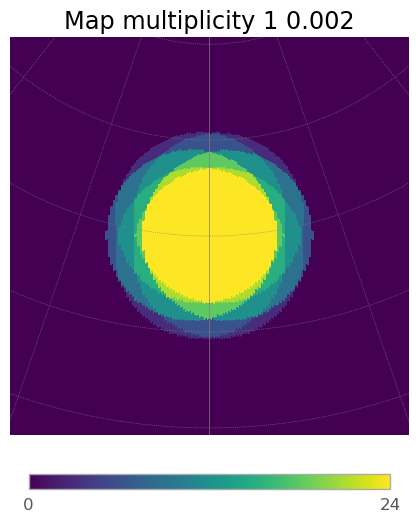

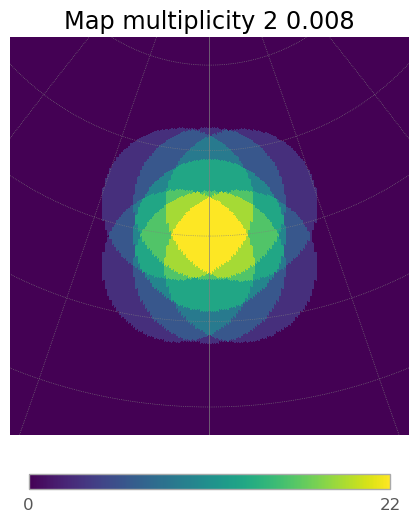

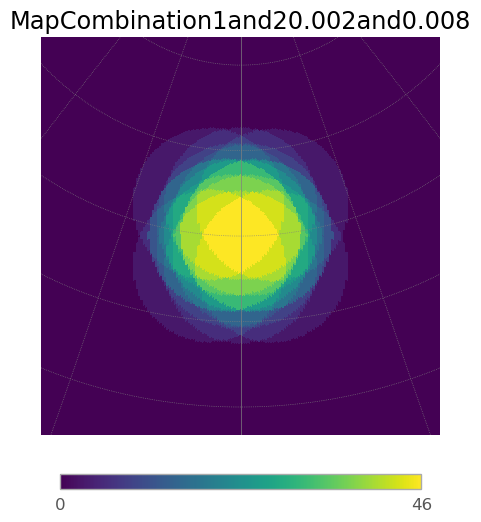

In [67]:
array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=0.002, div2=0.008, az=0, alt=70)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)


In [30]:
divergence_list=[0.0022, 0.0043, 0.008, 0.01135, 0.013]

In [ ]:
full_array_FoV_cut=[]
full_array_av_m_cut=[]
for divergence in divergence_list:   
    full_array.divergent_pointing(div=divergence)
    full_array_FoV_cut.append(full_array.hFoV(m_cut=3)[0])
    full_array_av_m_cut.append(full_array.hFoV(m_cut=3)[1])
    full_array.multiplicity_plot()

-45455.108531335434
0.0
27.686153846153847
ALT tel 0.00012881299133854208
-0.017968103459184988
ALT tel 0.00024511211918361
-0.009069997060519554
ALT tel 0.0006328053880434221
0.009069997060519554
ALT tel 0.0008300001393752389
0.017968103459184988
ALT tel 0.0002146197569243394
0.008740935946875162
ALT tel 0.0003802908442442064
-0.008740935946875162
ALT tel 0.00011411342685773267
-0.0
ALT tel 0.0003327950289839701
-0.008763524877986324
ALT tel 5.0977372037279205e-06
0.008763524877986324
ALT tel 0.00025294313214067784
-0.0
ALT tel 0.00045655599487446036
0.008925273905328969
ALT tel 0.00026877935785539947
-0.008925273905328969
ALT tel 3.850814582921738e-05
-0.0


13it [00:01,  6.80it/s]
13it [00:01,  6.97it/s]


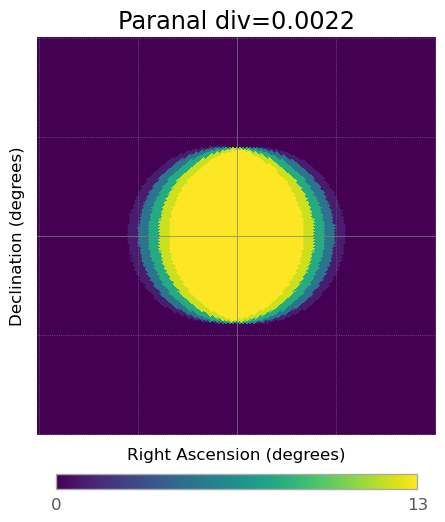

-23256.272029417607
0.0
27.686153846153847
ALT tel 0.00025165447432431786
-0.035108565984290956
ALT tel 0.0004877872373765608
-0.018050550436516405
ALT tel 0.0012593187533399145
0.018050550436516405
ALT tel 0.0016215221364361313
0.035108565984290956
ALT tel 0.0004122998121313846
0.01679253549254092
ALT tel 0.0007305656852138931
-0.01679253549254092
ALT tel 0.00022307455732311143
-0.0
ALT tel 0.0006448119408079414
-0.016980497905846822
ALT tel 9.877197277378915e-06
0.016980497905846822
ALT tel 0.0004900087784480414
-0.0
ALT tel 0.000900180139709443
0.017598419614309777
ALT tel 0.0005299456678690814
-0.017598419614309777
ALT tel 7.595726022984919e-05
-0.0


13it [00:01,  6.91it/s]
13it [00:01,  7.07it/s]


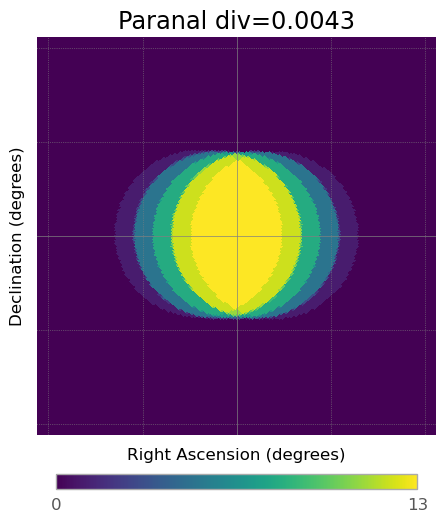

-12500.273070522871
0.0
27.686153846153847
ALT tel 0.00046748502997943307
-0.06525220313005538
ALT tel 0.0009373340196169219
-0.034691095840706766
ALT tel 0.0024199093181188893
0.034691095840706766
ALT tel 0.003012208455799532
0.06525220313005538
ALT tel 0.0007444996850854149
0.03032591197661481
ALT tel 0.0013191996636730207
-0.03032591197661481
ALT tel 0.0004151406020182402
-0.0
ALT tel 0.001181389364336361
-0.031114279789404217
ALT tel 1.8096469505283194e-05
0.031114279789404217
ALT tel 0.0008976416882706231
-0.0
ALT tel 0.0017007143523133461
0.033253207637103134
ALT tel 0.0010012291676555715
-0.033253207637103134
ALT tel 0.00014364204769150868
-0.0


13it [00:01,  6.63it/s]
13it [00:01,  7.01it/s]


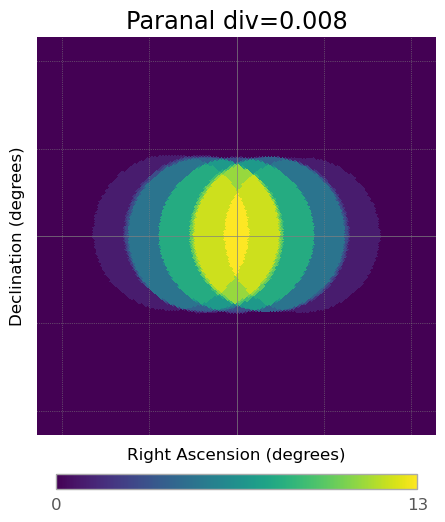

-8810.678245869876
0.0
27.686153846153847
ALT tel 0.000661827291625736
-0.09244484484048861
ALT tel 0.0013702823622438482
-0.050726278874155116
ALT tel 0.003537642645474541
0.050726278874155116
ALT tel 0.004264427151699716
0.09244484484048861
ALT tel 0.0010287116859962584
0.041908649298317745
ALT tel 0.001822802144267546
-0.041908649298317745
ALT tel 0.000589139556893953
-0.0
ALT tel 0.0016530559390593958
-0.04354332725289884
ALT tel 2.532144830711785e-05
0.04354332725289884
ALT tel 0.0012560754745609254
-0.0
ALT tel 0.0024467240852385176
0.04784904840887775
ALT tel 0.0014404142393989183
-0.04784904840887775
ALT tel 0.0002068779886913066
-0.0


13it [00:01,  7.28it/s]
13it [00:01,  6.98it/s]


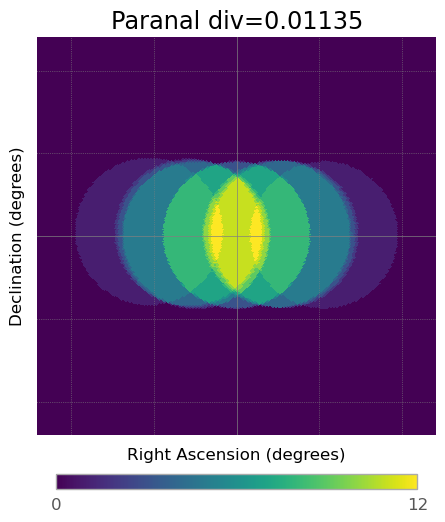

-7692.33074176595
0.0
27.686153846153847
ALT tel 0.0007570414129225346
-0.10579114373969431
ALT tel 0.0015931986282834412
-0.05898730756538083
ALT tel 0.004113137944761226
0.05898730756538083
ALT tel 0.004877922241493854
0.10579114373969431
ALT tel 0.0011632666750385292
0.0473941547993282
ALT tel 0.002061223346076358
-0.0473941547993282
ALT tel 0.0006748778148175243
-0.0
ALT tel 0.001880538363958087
-0.04954008928136023
ALT tel 2.8806023198199487e-05
0.04954008928136023
ALT tel 0.0014290360450527697
-0.0
ALT tel 0.002821690246251578
0.05518902012999468
ALT tel 0.0016611617890207088
-0.05518902012999468
ALT tel 0.00023873428520976444
-0.0


13it [00:01,  7.04it/s]
13it [00:01,  6.94it/s]


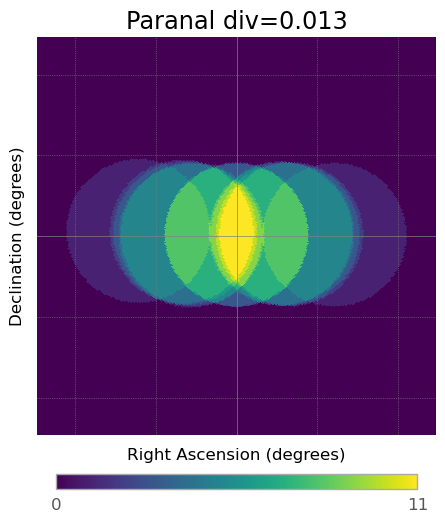

In [41]:
full_array_FoV=[]
full_array_av_m=[]
for divergence in divergence_list:   
    complete_array.divergent_pointing(div=divergence)
    #full_array_FoV.append(full_array.hFoV()[0])
    #full_array_av_m.append(full_array.hFoV()[1])
    complete_array.multiplicity_plot()

The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations[-0.67307692  0.         27.68615385]
The barycenter -0.6730769230769493
The barycenter 0.0
The barycenter 27.686153846153847
the barycenter for the calculations of the second divergence[-0.67307692  0.         27.68615385]
None
None
None
None
None
None
None


6it [00:00,  6.98it/s]
7it [00:00,  7.29it/s]
6it [00:00,  6.92it/s]


10.477672692584962


7it [00:01,  6.97it/s]


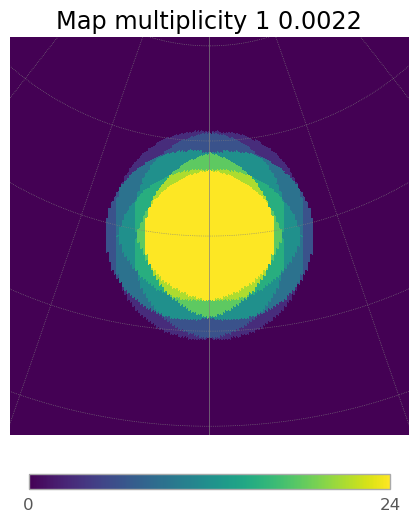

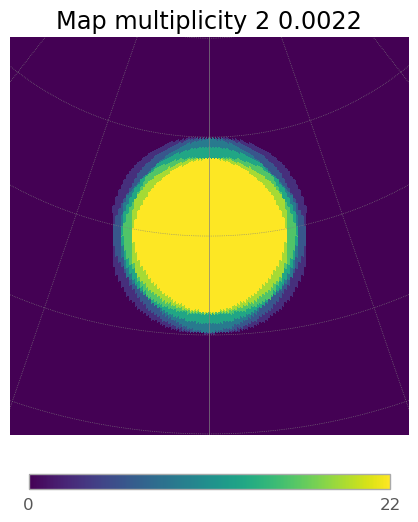

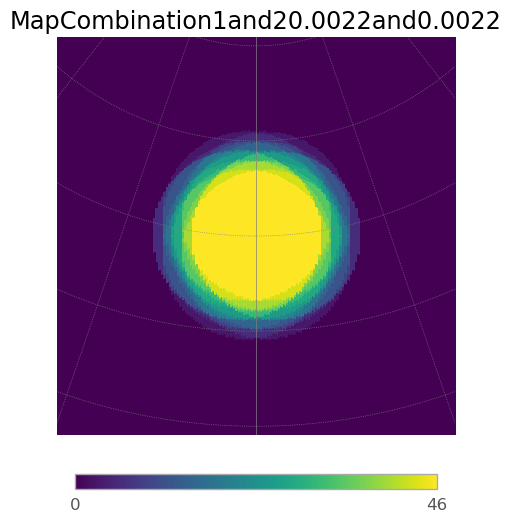

In [53]:
array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=0.0022, div2=0.0022, az=0, alt=70)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)



In [ ]:
full_array.divergent_pointing(div=0.007, az=0, alt=70)
full_array.multiplicity_plot()

In [ ]:
full_array.divergent_pointing(div=0.007, az=0, alt=70)
full_array.multiplicity_plot()

In [ ]:
full_array.hFoV()

In [ ]:
array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)

In [ ]:
## here we can play around a bit with the same number as before only that we stop at 0.013
#The idea could be to do an if lets see if I am able to do it 

# CHOOSING THE DIFFERENT CONVERGENCES
## DIV lets try 0.0022, 0.0043, 0.008, 0.01135, 0.013

In [ ]:
array_div.divergent_pointing(div=0.0022, az=0, alt=60)
array_div.multiplicity_plot()

In [ ]:
array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div)

In [ ]:
hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]

In [ ]:
hFoV_to_stop

In [ ]:
full_array

In [ ]:
conv=np.linspace(-0.0035,-0.0011, 20)
for convergence in conv:
    array_conv.divergent_pointing(complete_array=complete_array,div=convergence, az=0, alt=70)
    hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
    print(array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0])
    if hFoV_conv > hFoV_to_stop:
        convergence_to_stop=convergence
        print(f"stop, the {convergence}")
        break 

In [ ]:
convergence_to_stop

In [ ]:
conv=np.linspace(-0.0083,-0.0012, 100)
convergence_list=[]
divergence_list=[0.0022, 0.0043, 0.008, 0.01135, 0.013]
for divergence in divergence_list:
    for convergence in conv:
        array_div.divergent_pointing(complete_array=complete_array,div=divergence, az=0, alt=70)
        hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]
        array_conv.divergent_pointing(complete_array=complete_array, div=convergence, az=0, alt=70)
        hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
        if hFoV_conv > hFoV_to_stop:
            convergence=round(convergence,5)
            convergence_list.append(convergence)
            print(f"stop, the {convergence}")
            break 

In [ ]:
# Here i am not using the one that I normally use for the pointing with the corresponding barycenter because i am trying just to make an estimate

In [ ]:
for i in range(5):
    array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)


In [ ]:
# To do the hFoV and the average multiplicity 

In [ ]:
array_div.table

In [ ]:
hFoV_SST=[]
average_multiplicity_SST=[]
for i in range(5):
    array_conv.divergent_pointing_2_div(complete_array=complete_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    hFoV_SST.append(array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)[0])
    print(array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div))
    average_multiplicity_SST.append(array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)[1])


In [ ]:
hFoV_SST

In [ ]:
average_multiplicity_SST

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6)) 
# Plot Full Array
 #Full Array with m_cut = 3
l1=axes[0].plot(divergence_list, full_array_FoV_cut, label='FoV', marker='o', color='darkgreen')
ax2 = axes[0].twinx()
l2=ax2.plot(divergence_list, full_array_av_m_cut, label='Multiplicities',marker='*', color='limegreen')
axes[0].set_title('Full Array m_cut 3')
axes[0].set_xlabel('Divergence')
axes[0].set_ylabel('Field of view (m > 3) [deg$^2$]')
ax2.set_ylabel('Multiplicities (m>3)')
axeslegend = l1+l2
axes[0].legend(axeslegend, [l.get_label() for l in axeslegend])



#Plot the ones for subarray
l1=axes[1].plot(divergence_list,hFoV_SST, label='FoV',marker='o', color='darkgreen')
ax5=axes[1].twinx()
l2=ax5.plot(divergence_list, average_multiplicity_SST, label='Multiplicity', marker='*', color='limegreen')
axes[1].set_title('Configurations SST')
axes[1].set_xlabel('Divergence')
axes[1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1].legend(axeslegend, [l.get_label() for l in axeslegend])
#Plot the ones for subarray 2

# Adjust layout
plt.tight_layout()
# Subarray 4
# Adjust layout
plt.show()

In [ ]:
print( full_array_FoV_cut)


In [ ]:
print(full_array_av_m_cut)

In [ ]:
print(full_array_FoV)

In [ ]:
print(full_array_av_m)

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10,7))
p1 = ax.plot(divergence_list, hFoV_SST, label='FoV',marker='o', color='darkgreen')
p3=plt.scatter(divergence_list, full_array_FoV_cut, label='FoV eff no subarray[m_cut=3]', marker='o', color='darkmagenta')
#p5=plt.scatter(chosen_divergences, FoV_full_array_no_multiplicity_cut, label='FoV no  subarray nor m_cut', marker='o', color='navy')
ax.set_xlabel('Divergence')
ax.set_ylabel('Field of view [deg$^2$]')


ax2 = ax.twinx()
p2 = ax2.plot(divergence_list, average_multiplicity_SST, label='Multiplicity', marker='*', color='limegreen')
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
plt.title("SST comparisson")

p4=plt.scatter(divergence_list, full_array_av_m_cut, label='Multiplicities eff no subarray [m_cut=3]',marker='*', color='magenta')
#p6=plt.scatter(chosen_divergences, multiplicity_full_array_no_multiplicity_cut, label='Multiplicity no  subarray nor m_cut', marker='*', color='royalblue')
ps = p1+p2+[p3]+[p4]
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10,7))
p1 = ax.plot(divergence_list , hFoV_SST, label='FoV',marker='o', color='darkgreen')
p3=plt.scatter(divergence_list, full_array_FoV_cut, label='FoV eff no subarray[m_cut=3]', marker='o', color='darkmagenta')
p5=plt.scatter(divergence_list, full_array_FoV, label='FoV no  subarray nor m_cut', marker='o', color='navy')
ax.set_xlabel('Divergence')
ax.set_ylabel('Field of view [deg$^2$]')


ax2 = ax.twinx()
p2 = ax2.plot(divergence_list, average_multiplicity_SST, label='Multiplicity', marker='*', color='limegreen')
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
plt.title("SST COMPARISSON ")

p4=plt.scatter(divergence_list,  full_array_av_m_cut, label='Multiplicities eff no subarray [m_cut=3]',marker='*', color='magenta')
p6=plt.scatter(divergence_list, full_array_av_m, label='Multiplicity no  subarray nor m_cut', marker='*', color='royalblue')
ps = p1+p2+[p3]+[p4] +[p5]+[p6]
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

In [ ]:
complete_array.table

In [ ]:
array_div.table


In [ ]:
array_conv.table

In [ ]:
print(type(number_of_telescopes_config_SST_conv))

In [ ]:
number_of_telescopes_config_SST_conv

In [ ]:
array.combination_bar_graph_av_mult_SST(array_div, full_array,subarray_mult=number_of_telescopes_subarray_1)




In [ ]:
for i in range(5):
    array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    full_array.divergent_pointing(div=divergence_list[i], az=0, alt=70)
    array_conv.combination_bar_graph_av_mult_SST(array_1_2=array_div, array_2=full_array,subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_1_2=number_of_telescopes_config_SST_div)




    

In [ ]:
number_of_telescopes_config_SST_div


In [ ]:
for i in range(5):
    array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    full_array.divergent_pointing(div=divergence_list[i], az=0, alt=70)
    array_conv.combination_bar_graph_av_mult_SST(array_1_2=array_div, array_2=full_array,subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_1_2=number_of_telescopes_config_SST_div)


In [ ]:
array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=0, div2=0, az=0, alt=70)
array_conv.combiantion_of_FoV_bar_graph(number_of_arrays=2, array_2=array_div, array_3=None, array_4=None, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div, subarray_mult_3=None, subarray_mult_4=None, m_cut=45)[0]





In [ ]:

for i in range(5):
    hFoV_graph=[]
    multiplicities=[]
    array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    full_array.divergent_pointing(div=divergence_list[i], az=0, alt=70)
    hFoV_graph.append(array_conv.hFoV_for_2_arrays_bar_graph(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv,subarray_mult_2=number_of_telescopes_config_SST_div)[0])
    for j in range(45):
        multiplicities.append(j+1)
    plt.figure(figsize=(8, 6)) 
    plt.bar(multiplicities, np.array(hFoV_graph[0]).flatten(), color='limegreen')
    plt.xlabel("Multiplicities")
    plt.ylabel("hFoV[$deg^2$]")
    plt.title(f"div:{divergence_list[i]}")
    plt.grid(axis='y', alpha=0.4)
    plt.show()   


In [ ]:
for div in stop_div:
    array.divergent_pointing(div=div, az=0, alt=70)
    hFoV_graph=[]
    multiplicities=[]
    hFoV_graph.append(array.hFoV_bar_graph(subarray_mult=number_of_telescopes_subarray_1,multiplicity_max=14)[0])
    for i in range(14):
        multiplicities.append(i+1)
    plt.figure(figsize=(8, 6)) 
    plt.bar(multiplicities, np.array(hFoV_graph[0]).flatten(), color='limegreen')
    plt.xlabel("Multiplicities")
    plt.ylabel("hFoV[$deg^2$]")
    plt.title(f"Div={div}")
    plt.grid(axis='y', alpha=0.4)
    plt.show()     


In [ ]:
hFoV_graph=[]
multiplicities=[]
array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=0.000001, div2=0.000001, az=0, alt=70)
full_array.divergent_pointing(div=0.001, az=0, alt=70)
hFoV_graph.append(array_conv.hFoV_for_2_arrays_bar_graph(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv,subarray_mult_2=number_of_telescopes_config_SST_div)[0])
for j in range(45):
    multiplicities.append(j+1)
plt.figure(figsize=(8, 6)) 
plt.bar(multiplicities, np.array(hFoV_graph[0]).flatten(), color='limegreen')
plt.xlabel("Multiplicities")
plt.ylabel("hFoV[$deg^2$]")
plt.title(f"div:{0}")
plt.grid(axis='y', alpha=0.4)
plt.show()   

In [ ]:
for i in range(5):
    hFoV_graph=[]
    multiplicities=[]
    array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=convergence_list[i], div2=divergence_list[i], az=0, alt=70)
    full_array.divergent_pointing(div=divergence_list[i], az=0, alt=70)
    hFoV_graph.append(array_conv.hFoV_for_2_arrays_bar_graph(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv,subarray_mult_2=number_of_telescopes_config_SST_div)[0])
    for j in range(45):
        multiplicities.append(j+1)
    plt.figure(figsize=(8, 6)) 
    plt.bar(multiplicities, np.array(hFoV_graph[0]).flatten(), color='limegreen')
    plt.xlabel("Multiplicities")
    plt.ylabel("hFoV[$deg^2$]")
    plt.title(f"div:{divergence_list[i]}")
    plt.grid(axis='y', alpha=0.4)
    plt.show()   

In [ ]:
array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=0.002, div2=0.002, az=0, alt=70)
array_conv.hFoV_for_2_arrays_bar_graph(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)[0]




In [ ]:
array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv,subarray_mult_2=number_of_telescopes_config_SST_div)[0]


In [ ]:
array_conv.combiantion_of_FoV_bar_graph(number_of_arrays=2, array_2=array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)[0]




In [ ]:
array_conv.combiantion_of_FoV(number_of_arrays=2, array_2=array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)[0]

In [ ]:
full_array.divergent_pointing(div=0, az=0, alt=70)
full_array.hFoV()